# Slide 25: Testing Distribution Assumptions - The Cookie Recipe
## Simple Explanation + Real-World Example

Check if your "oven" (data) is working right before "baking" (statistical testing)! Just like you wouldn't bake cookies in a broken oven, you shouldn't run statistical tests on data that doesn't meet the assumptions.

## Setup and Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, normaltest, jarque_bera, anderson
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🍪 Testing Distribution Assumptions Made Simple!")
print("=" * 55)

🍪 Testing Distribution Assumptions Made Simple!


---
## 🍪 Simple Explanation: The Cookie Oven Analogy

Imagine you're baking cookies for a school fundraiser. You have three different ovens, but they all work differently...

🍪 THE GREAT COOKIE BAKING EXPERIMENT
We're baking 1000 cookies using three different ovens...
Each oven represents a different type of data distribution!



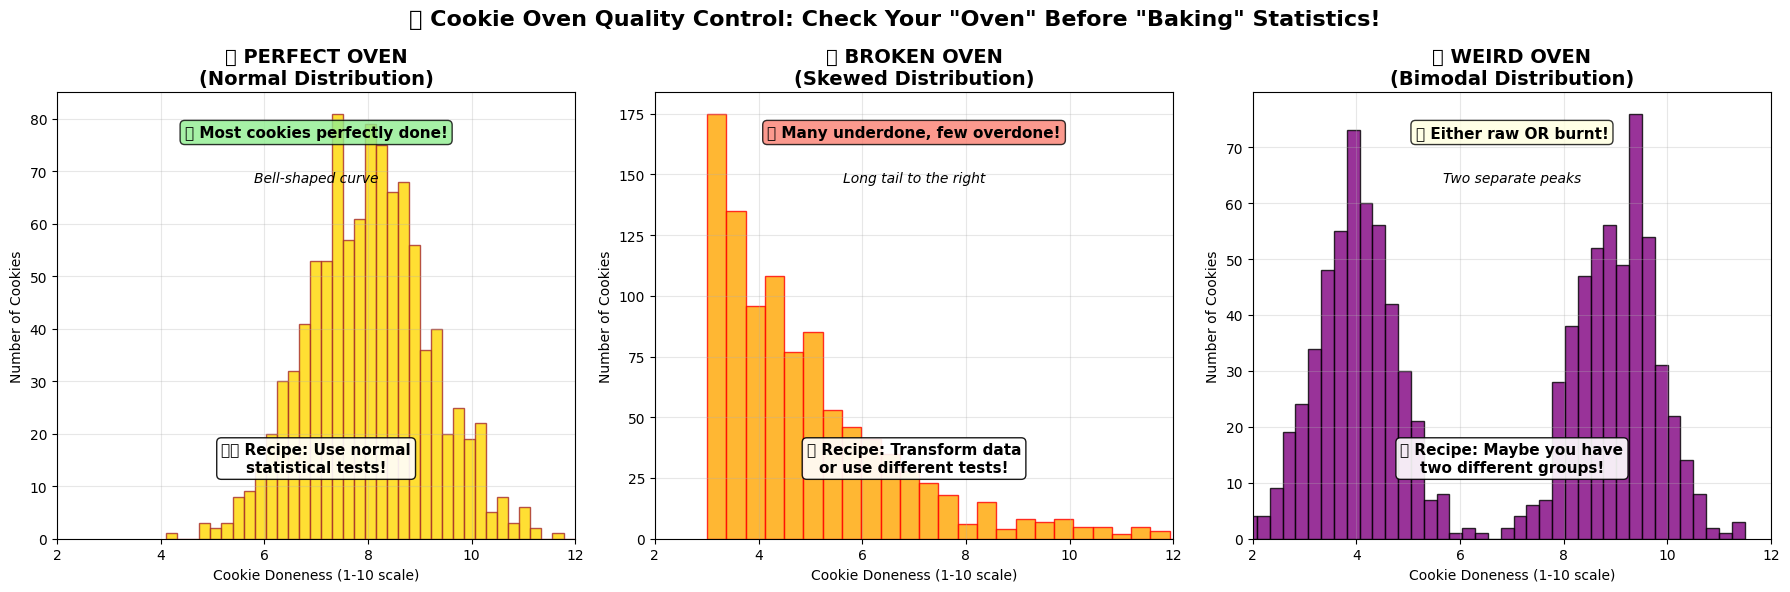

🎯 THE COOKIE WISDOM FOR DATA ANALYSIS:
• Perfect oven (normal data) → Use t-tests, ANOVA, linear regression
• Broken oven (skewed data) → Transform your data or use non-parametric tests
• Weird oven (bimodal data) → Maybe you have two different populations!

💡 KEY LESSON: Always check your data distribution BEFORE choosing statistical tests!


In [2]:
def cookie_oven_demonstration():
    """Visual demonstration of different data distributions using cookie baking analogy"""
    
    print("🍪 THE GREAT COOKIE BAKING EXPERIMENT")
    print("=" * 45)
    print("We're baking 1000 cookies using three different ovens...")
    print("Each oven represents a different type of data distribution!\n")
    
    np.random.seed(42)
    
    # Generate three different "cookie doneness" distributions
    # Perfect oven (normal distribution) - most cookies perfectly done
    perfect_oven = np.random.normal(8, 1.2, 1000)  # centered at 8/10 doneness
    
    # Broken oven (right-skewed) - mostly underdone with few overdone
    broken_oven = np.random.exponential(2, 1000) + 3
    
    # Weird oven (bimodal) - either underdone OR overdone, rarely just right
    weird_oven = np.concatenate([
        np.random.normal(4, 0.8, 500),   # Underdone batch
        np.random.normal(9, 0.8, 500)   # Overdone batch
    ])
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    # Perfect Oven
    ax1.hist(perfect_oven, bins=40, alpha=0.8, color='gold', edgecolor='brown', linewidth=1)
    ax1.set_title('🔥 PERFECT OVEN\n(Normal Distribution)', fontsize=14, weight='bold')
    ax1.set_xlabel('Cookie Doneness (1-10 scale)')
    ax1.set_ylabel('Number of Cookies')
    ax1.text(0.5, 0.9, '✅ Most cookies perfectly done!', transform=ax1.transAxes, 
             fontsize=11, ha='center', weight='bold',
             bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.8))
    ax1.text(0.5, 0.8, 'Bell-shaped curve', transform=ax1.transAxes, 
             fontsize=10, ha='center', style='italic')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(2, 12)
    
    # Add "recipe recommendation"
    ax1.text(0.5, 0.15, '👨‍🍳 Recipe: Use normal\nstatistical tests!', 
             transform=ax1.transAxes, fontsize=11, ha='center', weight='bold',
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.9))
    
    # Broken Oven
    ax2.hist(broken_oven, bins=40, alpha=0.8, color='orange', edgecolor='red', linewidth=1)
    ax2.set_title('🔥 BROKEN OVEN\n(Skewed Distribution)', fontsize=14, weight='bold')
    ax2.set_xlabel('Cookie Doneness (1-10 scale)')
    ax2.set_ylabel('Number of Cookies')
    ax2.text(0.5, 0.9, '❌ Many underdone, few overdone!', transform=ax2.transAxes, 
             fontsize=11, ha='center', weight='bold',
             bbox=dict(boxstyle="round", facecolor="salmon", alpha=0.8))
    ax2.text(0.5, 0.8, 'Long tail to the right', transform=ax2.transAxes, 
             fontsize=10, ha='center', style='italic')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(2, 12)
    
    ax2.text(0.5, 0.15, '🔧 Recipe: Transform data\nor use different tests!', 
             transform=ax2.transAxes, fontsize=11, ha='center', weight='bold',
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.9))
    
    # Weird Oven
    ax3.hist(weird_oven, bins=40, alpha=0.8, color='purple', edgecolor='black', linewidth=1)
    ax3.set_title('🔥 WEIRD OVEN\n(Bimodal Distribution)', fontsize=14, weight='bold')
    ax3.set_xlabel('Cookie Doneness (1-10 scale)')
    ax3.set_ylabel('Number of Cookies')
    ax3.text(0.5, 0.9, '🤪 Either raw OR burnt!', transform=ax3.transAxes, 
             fontsize=11, ha='center', weight='bold',
             bbox=dict(boxstyle="round", facecolor="lightyellow", alpha=0.8))
    ax3.text(0.5, 0.8, 'Two separate peaks', transform=ax3.transAxes, 
             fontsize=10, ha='center', style='italic')
    ax3.grid(True, alpha=0.3)
    ax3.set_xlim(2, 12)
    
    ax3.text(0.5, 0.15, '🔍 Recipe: Maybe you have\ntwo different groups!', 
             transform=ax3.transAxes, fontsize=11, ha='center', weight='bold',
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.9))
    
    plt.suptitle('🍪 Cookie Oven Quality Control: Check Your "Oven" Before "Baking" Statistics!', 
                fontsize=16, weight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    print("🎯 THE COOKIE WISDOM FOR DATA ANALYSIS:")
    print("• Perfect oven (normal data) → Use t-tests, ANOVA, linear regression")
    print("• Broken oven (skewed data) → Transform your data or use non-parametric tests")
    print("• Weird oven (bimodal data) → Maybe you have two different populations!")
    print("\n💡 KEY LESSON: Always check your data distribution BEFORE choosing statistical tests!")
    
    return perfect_oven, broken_oven, weird_oven

perfect_cookies, broken_cookies, weird_cookies = cookie_oven_demonstration()

---
## 🔍 How to Test Your "Oven" - Distribution Testing Tools

Now let's learn the actual tools data scientists use to check if their data is "normal" (like the perfect oven).

🔍 DISTRIBUTION TESTING TOOLKIT
Let's test our three 'ovens' to see which ones are working properly...



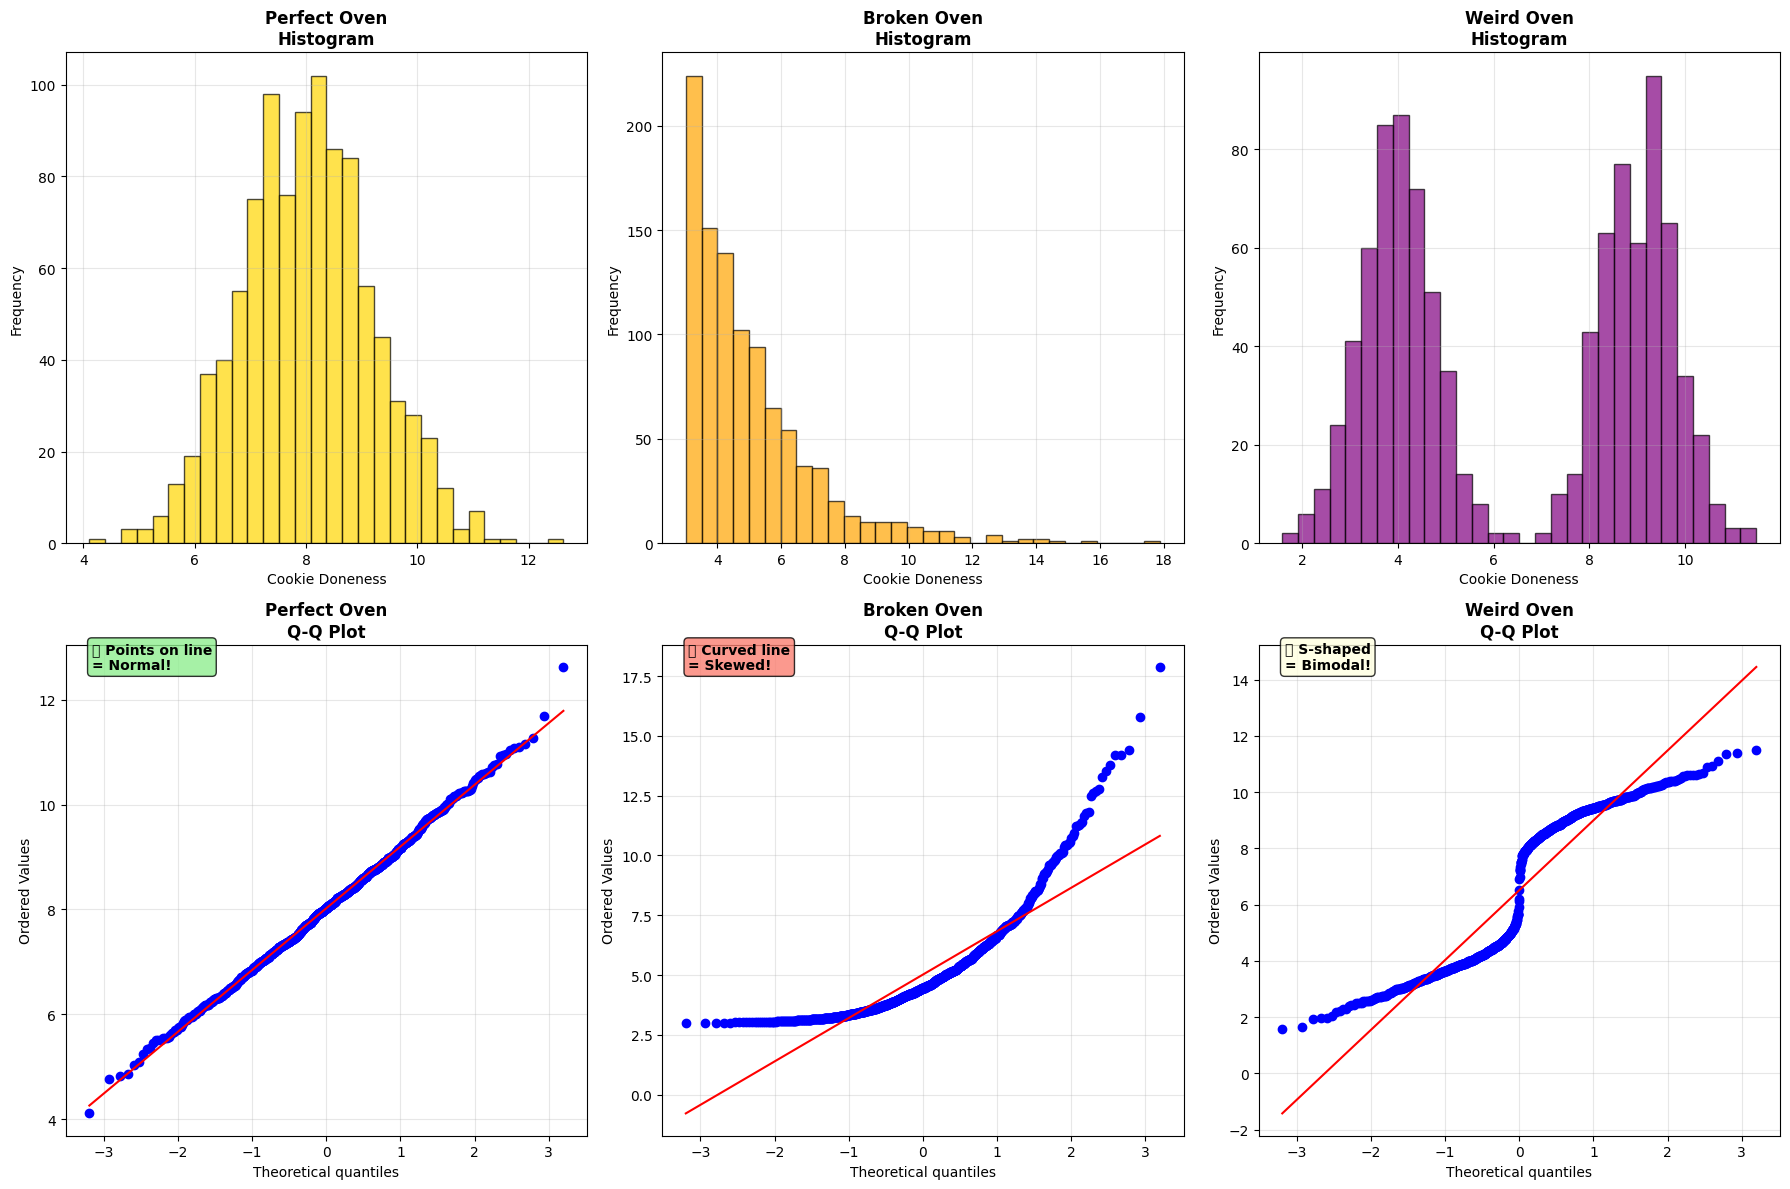

📊 STATISTICAL TEST RESULTS:


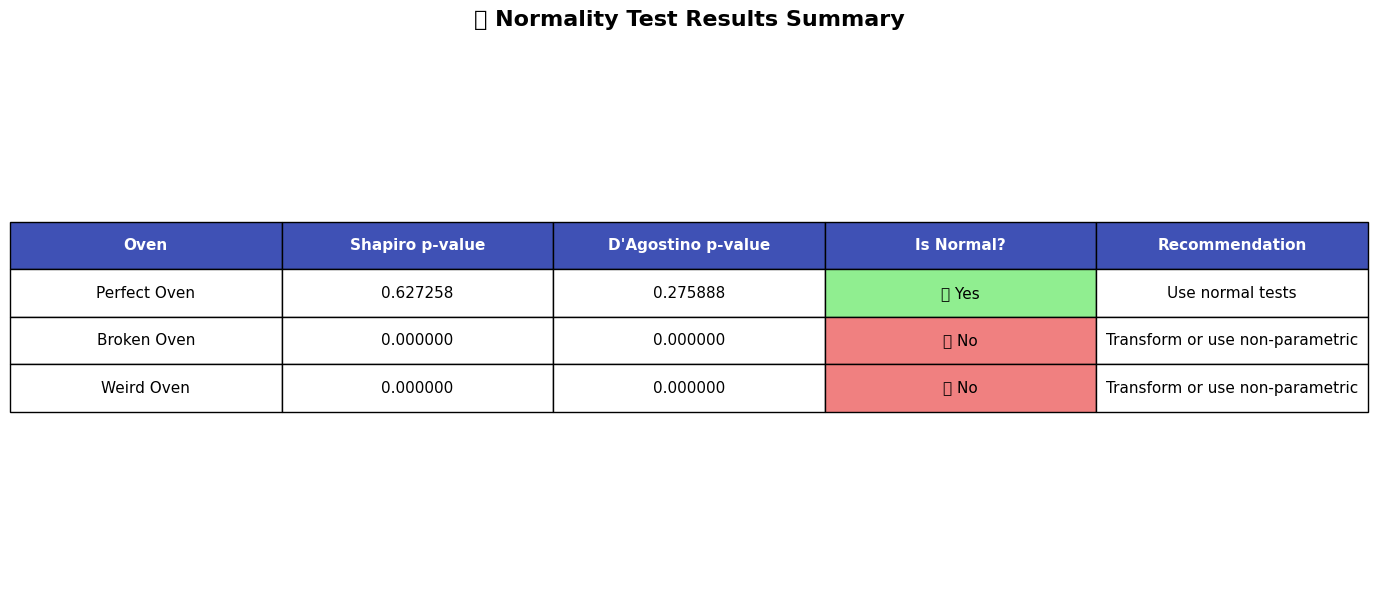


🔬 HOW TO READ THE TESTS:
• P-value > 0.05 → Data looks normal (null hypothesis: data is normal)
• P-value ≤ 0.05 → Data is NOT normal (reject null hypothesis)
• Shapiro-Wilk: Most powerful test, but limited to smaller samples
• D'Agostino: Good for larger samples, tests skewness and kurtosis


In [3]:
def distribution_testing_toolkit():
    """Demonstrate different tools for testing normality"""
    
    print("🔍 DISTRIBUTION TESTING TOOLKIT")
    print("=" * 40)
    print("Let's test our three 'ovens' to see which ones are working properly...\n")
    
    ovens = {
        'Perfect Oven': perfect_cookies,
        'Broken Oven': broken_cookies, 
        'Weird Oven': weird_cookies
    }
    
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 12))
    axes_top = [ax1, ax2, ax3]
    axes_bottom = [ax4, ax5, ax6]
    colors = ['gold', 'orange', 'purple']
    
    # Visual tests: Histograms and Q-Q plots
    test_results = []
    
    for i, (oven_name, cookies) in enumerate(ovens.items()):
        # Histogram (top row)
        ax_hist = axes_top[i]
        ax_hist.hist(cookies, bins=30, alpha=0.7, color=colors[i], edgecolor='black')
        ax_hist.set_title(f'{oven_name}\nHistogram', fontsize=12, weight='bold')
        ax_hist.set_xlabel('Cookie Doneness')
        ax_hist.set_ylabel('Frequency')
        ax_hist.grid(True, alpha=0.3)
        
        # Q-Q plot (bottom row) 
        ax_qq = axes_bottom[i]
        stats.probplot(cookies, dist="norm", plot=ax_qq)
        ax_qq.set_title(f'{oven_name}\nQ-Q Plot', fontsize=12, weight='bold')
        ax_qq.grid(True, alpha=0.3)
        
        # Add interpretation to Q-Q plot
        if i == 0:  # Perfect oven
            ax_qq.text(0.05, 0.95, '✅ Points on line\n= Normal!', 
                      transform=ax_qq.transAxes, fontsize=10, weight='bold',
                      bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.8))
        elif i == 1:  # Broken oven
            ax_qq.text(0.05, 0.95, '📈 Curved line\n= Skewed!', 
                      transform=ax_qq.transAxes, fontsize=10, weight='bold',
                      bbox=dict(boxstyle="round", facecolor="salmon", alpha=0.8))
        else:  # Weird oven
            ax_qq.text(0.05, 0.95, '🎢 S-shaped\n= Bimodal!', 
                      transform=ax_qq.transAxes, fontsize=10, weight='bold',
                      bbox=dict(boxstyle="round", facecolor="lightyellow", alpha=0.8))
        
        # Statistical tests (use sample for speed)
        sample = np.random.choice(cookies, size=min(1000, len(cookies)), replace=False)
        
        # Shapiro-Wilk test (most common)
        if len(sample) <= 5000:  # Shapiro has size limits
            shapiro_stat, shapiro_p = shapiro(sample[:1000])  # Max 1000 for Shapiro
        else:
            shapiro_stat, shapiro_p = np.nan, np.nan
        
        # D'Agostino's test
        dagostino_stat, dagostino_p = normaltest(sample)
        
        # Interpretation
        is_normal_shapiro = shapiro_p > 0.05 if not np.isnan(shapiro_p) else "N/A"
        is_normal_dagostino = dagostino_p > 0.05
        
        test_results.append({
            'Oven': oven_name,
            'Shapiro p-value': f'{shapiro_p:.6f}' if not np.isnan(shapiro_p) else "N/A",
            'D\'Agostino p-value': f'{dagostino_p:.6f}',
            'Is Normal?': '✅ Yes' if (is_normal_shapiro == True and is_normal_dagostino) else '❌ No',
            'Recommendation': 'Use normal tests' if (is_normal_shapiro == True and is_normal_dagostino) else 'Transform or use non-parametric'
        })
    
    plt.tight_layout()
    plt.show()
    
    # Display test results
    print("📊 STATISTICAL TEST RESULTS:")
    print("=" * 50)
    
    df_results = pd.DataFrame(test_results)
    
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.axis('tight')
    ax.axis('off')
    
    table = ax.table(cellText=df_results.values,
                    colLabels=df_results.columns,
                    cellLoc='center',
                    loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1.3, 2.5)
    
    # Color code the results
    for i in range(len(df_results.columns)):
        table[(0, i)].set_facecolor('#3F51B5')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Color code the "Is Normal?" column
    for i in range(1, len(df_results) + 1):
        if '✅' in table[(i, 3)].get_text().get_text():
            table[(i, 3)].set_facecolor('lightgreen')
        else:
            table[(i, 3)].set_facecolor('lightcoral')
    
    ax.set_title('🧪 Normality Test Results Summary', 
                fontsize=16, weight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    print("\n🔬 HOW TO READ THE TESTS:")
    print("• P-value > 0.05 → Data looks normal (null hypothesis: data is normal)")
    print("• P-value ≤ 0.05 → Data is NOT normal (reject null hypothesis)")
    print("• Shapiro-Wilk: Most powerful test, but limited to smaller samples")
    print("• D'Agostino: Good for larger samples, tests skewness and kurtosis")
    
    return df_results

results_df = distribution_testing_toolkit()

---
## 📈 Real-World Example: Sales Data Analysis

Let's see how this works with real business data - analyzing daily sales from three different stores.

📈 BUSINESS SCENARIO: Multi-Store Sales Analysis
You manage 3 stores and want to analyze daily sales patterns.
Each store has different customer patterns and sales distributions.



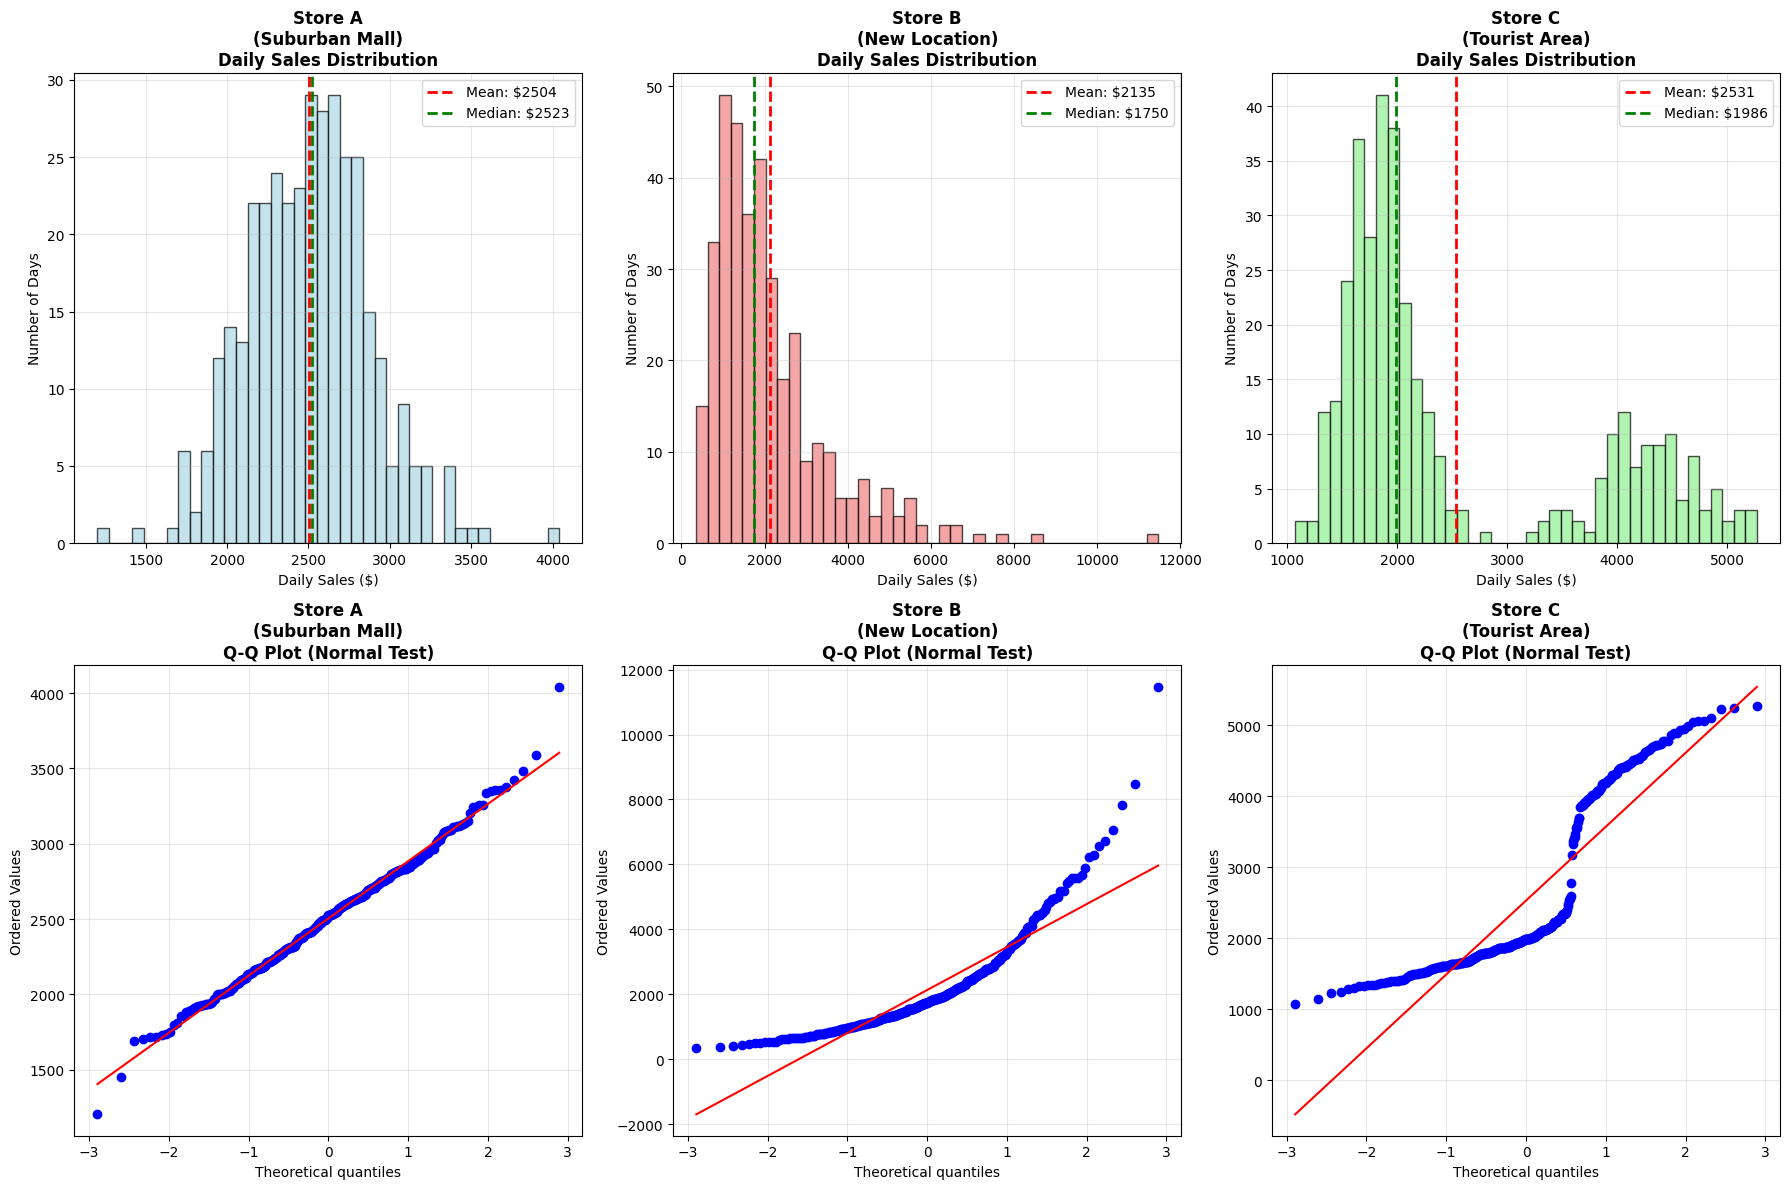

💼 BUSINESS ANALYSIS RESULTS:


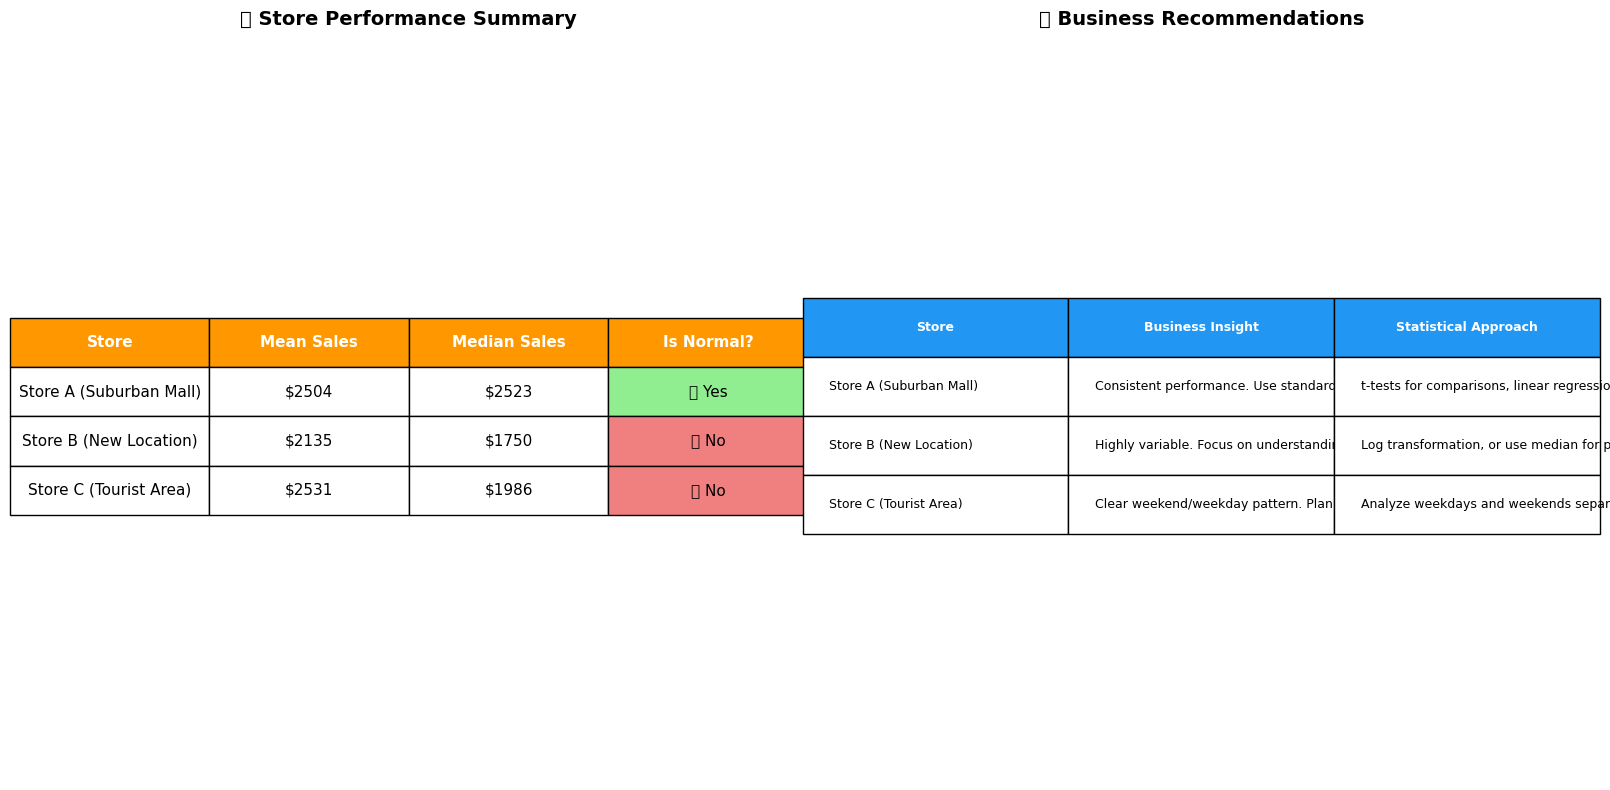


🎯 KEY BUSINESS TAKEAWAYS:
📊 Store A (Normal): Predictable performance → Use standard forecasting
📈 Store B (Skewed): High variability → Focus on understanding peak days
📅 Store C (Bimodal): Weekend pattern → Plan different strategies by day type

💡 CRITICAL LESSON: Wrong statistical approach → Wrong business decisions!
   Always test your assumptions before running analysis.


In [4]:
def real_world_sales_analysis():
    """Real business example: Testing normality in sales data"""
    
    print("📈 BUSINESS SCENARIO: Multi-Store Sales Analysis")
    print("=" * 55)
    print("You manage 3 stores and want to analyze daily sales patterns.")
    print("Each store has different customer patterns and sales distributions.\n")
    
    np.random.seed(42)
    
    # Generate realistic sales data for 365 days
    days = 365
    
    # Store A: Well-managed, consistent performance (normal distribution)
    store_a_sales = np.random.normal(2500, 400, days)  # Mean $2500, std $400
    store_a_sales = np.maximum(store_a_sales, 500)  # No negative sales
    
    # Store B: New store, mostly low sales with occasional big days (right-skewed)
    store_b_sales = np.random.lognormal(7.5, 0.6, days)  # Log-normal distribution
    
    # Store C: Tourist area, weekend vs weekday pattern (bimodal)
    weekday_sales = np.random.normal(1800, 300, int(days * 5/7))  # Lower weekday sales
    weekend_sales = np.random.normal(4200, 500, int(days * 2/7))  # Higher weekend sales
    store_c_sales = np.concatenate([weekday_sales, weekend_sales])
    np.random.shuffle(store_c_sales)  # Mix them up to simulate random days
    
    stores_data = {
        'Store A\n(Suburban Mall)': store_a_sales,
        'Store B\n(New Location)': store_b_sales,
        'Store C\n(Tourist Area)': store_c_sales
    }
    
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 12))
    axes_hist = [ax1, ax2, ax3]
    axes_qq = [ax4, ax5, ax6]
    colors = ['lightblue', 'lightcoral', 'lightgreen']
    
    business_insights = []
    
    for i, (store_name, sales_data) in enumerate(stores_data.items()):
        # Histogram
        ax_hist = axes_hist[i]
        ax_hist.hist(sales_data, bins=40, alpha=0.7, color=colors[i], edgecolor='black')
        ax_hist.axvline(np.mean(sales_data), color='red', linestyle='--', linewidth=2,
                       label=f'Mean: ${np.mean(sales_data):.0f}')
        ax_hist.axvline(np.median(sales_data), color='green', linestyle='--', linewidth=2,
                       label=f'Median: ${np.median(sales_data):.0f}')
        ax_hist.set_title(f'{store_name}\nDaily Sales Distribution', fontsize=12, weight='bold')
        ax_hist.set_xlabel('Daily Sales ($)')
        ax_hist.set_ylabel('Number of Days')
        ax_hist.legend()
        ax_hist.grid(True, alpha=0.3)
        
        # Q-Q plot
        ax_qq = axes_qq[i]
        stats.probplot(sales_data, dist="norm", plot=ax_qq)
        ax_qq.set_title(f'{store_name}\nQ-Q Plot (Normal Test)', fontsize=12, weight='bold')
        ax_qq.grid(True, alpha=0.3)
        
        # Statistical tests
        sample_size = min(1000, len(sales_data))
        sample = sales_data[:sample_size]
        
        shapiro_stat, shapiro_p = shapiro(sample[:min(1000, len(sample))])
        dagostino_stat, dagostino_p = normaltest(sample)
        
        is_normal = shapiro_p > 0.05 and dagostino_p > 0.05
        
        # Business insights based on distribution
        if i == 0:  # Store A - Normal
            insight = "Consistent performance. Use standard forecasting models."
            recommendation = "t-tests for comparisons, linear regression for trends"
        elif i == 1:  # Store B - Skewed
            insight = "Highly variable. Focus on understanding big sales days."
            recommendation = "Log transformation, or use median for planning"
        else:  # Store C - Bimodal
            insight = "Clear weekend/weekday pattern. Plan inventory accordingly."
            recommendation = "Analyze weekdays and weekends separately"
        
        business_insights.append({
            'Store': store_name.replace('\n', ' '),
            'Mean Sales': f'${np.mean(sales_data):.0f}',
            'Median Sales': f'${np.median(sales_data):.0f}',
            'Shapiro p-value': f'{shapiro_p:.6f}',
            'Is Normal?': '✅ Yes' if is_normal else '❌ No',
            'Business Insight': insight,
            'Statistical Approach': recommendation
        })
    
    plt.tight_layout()
    plt.show()
    
    # Business insights table
    print("💼 BUSINESS ANALYSIS RESULTS:")
    print("=" * 45)
    
    df_business = pd.DataFrame(business_insights)
    
    # Display key metrics
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Summary statistics table
    summary_table = df_business[['Store', 'Mean Sales', 'Median Sales', 'Is Normal?']].copy()
    
    ax1.axis('tight')
    ax1.axis('off')
    table1 = ax1.table(cellText=summary_table.values,
                      colLabels=summary_table.columns,
                      cellLoc='center',
                      loc='center')
    table1.auto_set_font_size(False)
    table1.set_fontsize(11)
    table1.scale(1.2, 2.5)
    
    # Color code the header
    for i in range(len(summary_table.columns)):
        table1[(0, i)].set_facecolor('#FF9800')
        table1[(0, i)].set_text_props(weight='bold', color='white')
    
    # Color code normality results
    for i in range(1, len(summary_table) + 1):
        if '✅' in table1[(i, 3)].get_text().get_text():
            table1[(i, 3)].set_facecolor('lightgreen')
        else:
            table1[(i, 3)].set_facecolor('lightcoral')
    
    ax1.set_title('📊 Store Performance Summary', fontsize=14, weight='bold', pad=20)
    
    # Recommendations table
    recommendations_table = df_business[['Store', 'Business Insight', 'Statistical Approach']].copy()
    
    ax2.axis('tight')
    ax2.axis('off')
    table2 = ax2.table(cellText=recommendations_table.values,
                      colLabels=recommendations_table.columns,
                      cellLoc='left',
                      loc='center')
    table2.auto_set_font_size(False)
    table2.set_fontsize(9)
    table2.scale(1.2, 3)
    
    # Color code the header
    for i in range(len(recommendations_table.columns)):
        table2[(0, i)].set_facecolor('#2196F3')
        table2[(0, i)].set_text_props(weight='bold', color='white')
    
    ax2.set_title('💡 Business Recommendations', fontsize=14, weight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    print("\n🎯 KEY BUSINESS TAKEAWAYS:")
    print("📊 Store A (Normal): Predictable performance → Use standard forecasting")
    print("📈 Store B (Skewed): High variability → Focus on understanding peak days")
    print("📅 Store C (Bimodal): Weekend pattern → Plan different strategies by day type")
    print("\n💡 CRITICAL LESSON: Wrong statistical approach → Wrong business decisions!")
    print("   Always test your assumptions before running analysis.")
    
    return stores_data

sales_data = real_world_sales_analysis()

---
## 🛠️ What To Do When Your Data Isn't Normal

Don't panic! Here are your options when your "oven" isn't working perfectly.

🛠️ FIXING YOUR 'BROKEN OVEN' - Data Transformation Solutions
When your data isn't normal, you have several options...



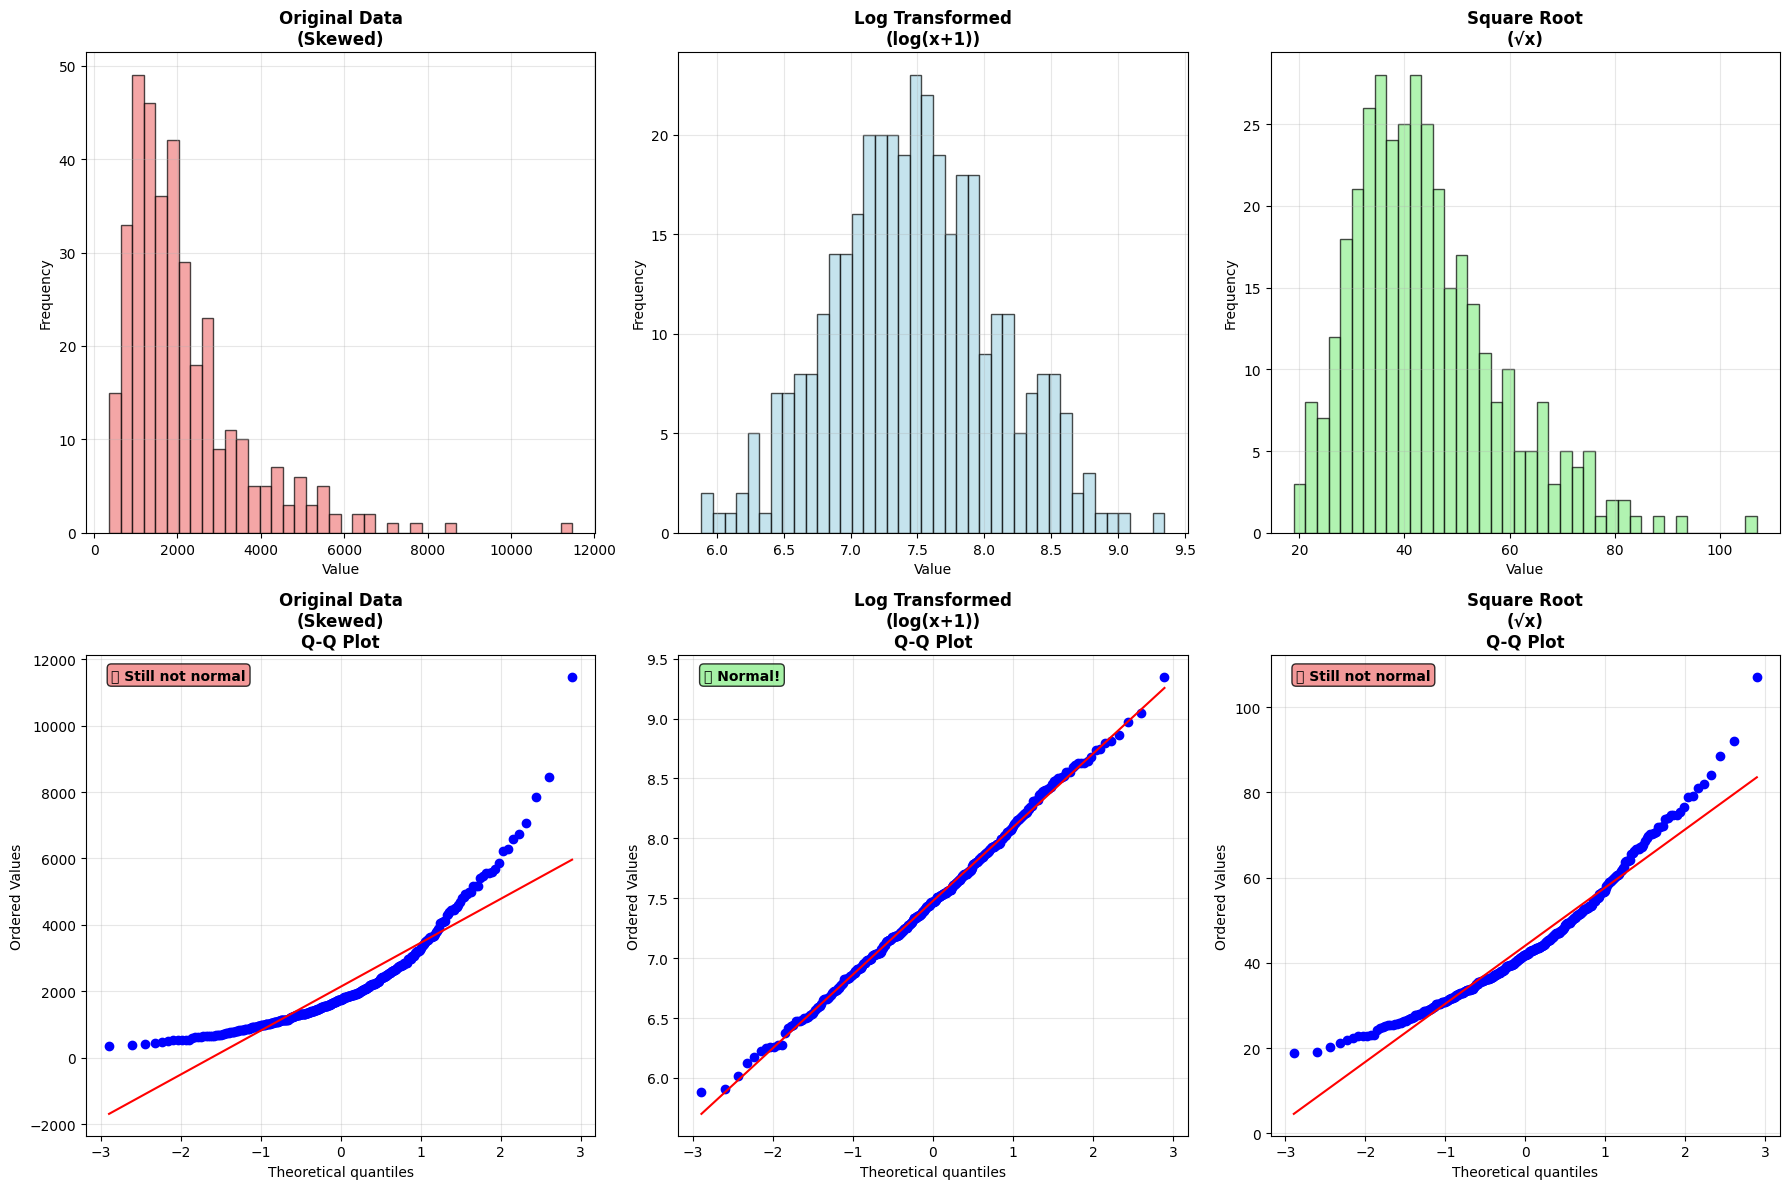

📊 TRANSFORMATION TEST RESULTS:


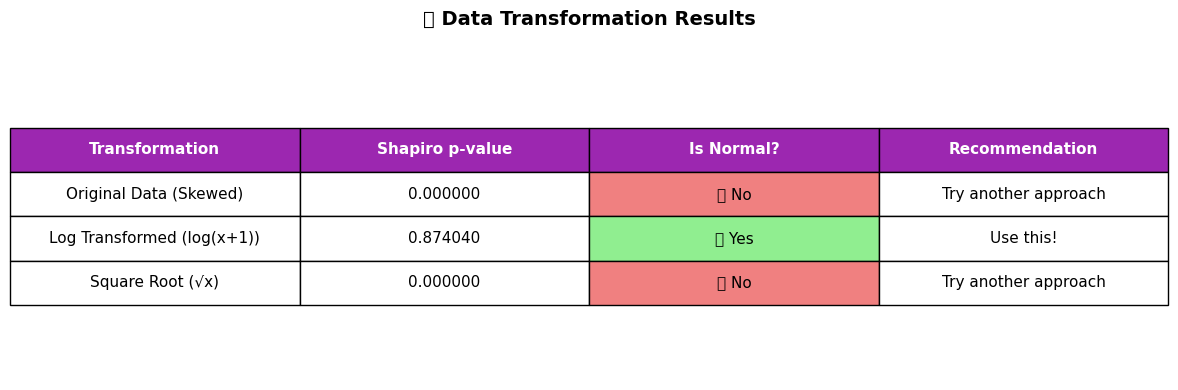


🎯 YOUR OPTIONS WHEN DATA ISN'T NORMAL:

1️⃣ TRANSFORM THE DATA:
   • Log transformation: Good for right-skewed data
   • Square root: Milder than log, good for counts
   • Box-Cox: Automatically finds best transformation

2️⃣ USE NON-PARAMETRIC TESTS:
   • Mann-Whitney instead of t-test
   • Kruskal-Wallis instead of ANOVA
   • Spearman correlation instead of Pearson

3️⃣ USE ROBUST METHODS:
   • Median instead of mean
   • Bootstrap confidence intervals
   • Robust regression techniques

4️⃣ ACCEPT NON-NORMALITY:
   • Some methods work even with non-normal data
   • Central Limit Theorem helps with large samples
   • Focus on practical significance


In [5]:
def data_transformation_solutions():
    """Show different ways to handle non-normal data"""
    
    print("🛠️ FIXING YOUR 'BROKEN OVEN' - Data Transformation Solutions")
    print("=" * 65)
    print("When your data isn't normal, you have several options...\n")
    
    # Use the skewed store B data from previous example
    skewed_data = sales_data['Store B\n(New Location)']
    
    # Try different transformations
    log_transformed = np.log(skewed_data + 1)  # Add 1 to avoid log(0)
    sqrt_transformed = np.sqrt(skewed_data)
    
    transformations = {
        'Original Data\n(Skewed)': skewed_data,
        'Log Transformed\n(log(x+1))': log_transformed,
        'Square Root\n(√x)': sqrt_transformed
    }
    
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 12))
    axes_hist = [ax1, ax2, ax3]
    axes_qq = [ax4, ax5, ax6]
    colors = ['lightcoral', 'lightblue', 'lightgreen']
    
    transformation_results = []
    
    for i, (transform_name, data) in enumerate(transformations.items()):
        # Histogram
        ax_hist = axes_hist[i]
        ax_hist.hist(data, bins=40, alpha=0.7, color=colors[i], edgecolor='black')
        ax_hist.set_title(f'{transform_name}', fontsize=12, weight='bold')
        ax_hist.set_xlabel('Value')
        ax_hist.set_ylabel('Frequency')
        ax_hist.grid(True, alpha=0.3)
        
        # Q-Q plot
        ax_qq = axes_qq[i]
        stats.probplot(data, dist="norm", plot=ax_qq)
        ax_qq.set_title(f'{transform_name}\nQ-Q Plot', fontsize=12, weight='bold')
        ax_qq.grid(True, alpha=0.3)
        
        # Test normality
        sample = data[:1000]  # Limit for Shapiro test
        shapiro_stat, shapiro_p = shapiro(sample)
        
        is_normal = shapiro_p > 0.05
        
        # Add result annotation
        result_text = '✅ Normal!' if is_normal else '❌ Still not normal'
        color = 'lightgreen' if is_normal else 'lightcoral'
        
        ax_qq.text(0.05, 0.95, result_text, transform=ax_qq.transAxes, 
                  fontsize=10, weight='bold',
                  bbox=dict(boxstyle="round", facecolor=color, alpha=0.8))
        
        transformation_results.append({
            'Transformation': transform_name.replace('\n', ' '),
            'Shapiro p-value': f'{shapiro_p:.6f}',
            'Is Normal?': '✅ Yes' if is_normal else '❌ No',
            'Recommendation': 'Use this!' if is_normal else 'Try another approach'
        })
    
    plt.tight_layout()
    plt.show()
    
    # Show transformation results
    print("📊 TRANSFORMATION TEST RESULTS:")
    df_transforms = pd.DataFrame(transformation_results)
    
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.axis('tight')
    ax.axis('off')
    
    table = ax.table(cellText=df_transforms.values,
                    colLabels=df_transforms.columns,
                    cellLoc='center',
                    loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1.3, 2.5)
    
    # Color code results
    for i in range(len(df_transforms.columns)):
        table[(0, i)].set_facecolor('#9C27B0')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    for i in range(1, len(df_transforms) + 1):
        if '✅' in table[(i, 2)].get_text().get_text():
            table[(i, 2)].set_facecolor('lightgreen')
        else:
            table[(i, 2)].set_facecolor('lightcoral')
    
    ax.set_title('🔧 Data Transformation Results', fontsize=14, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    print("\n🎯 YOUR OPTIONS WHEN DATA ISN'T NORMAL:")
    print("\n1️⃣ TRANSFORM THE DATA:")
    print("   • Log transformation: Good for right-skewed data")
    print("   • Square root: Milder than log, good for counts")
    print("   • Box-Cox: Automatically finds best transformation")
    print("\n2️⃣ USE NON-PARAMETRIC TESTS:")
    print("   • Mann-Whitney instead of t-test")
    print("   • Kruskal-Wallis instead of ANOVA")
    print("   • Spearman correlation instead of Pearson")
    print("\n3️⃣ USE ROBUST METHODS:")
    print("   • Median instead of mean")
    print("   • Bootstrap confidence intervals")
    print("   • Robust regression techniques")
    print("\n4️⃣ ACCEPT NON-NORMALITY:")
    print("   • Some methods work even with non-normal data")
    print("   • Central Limit Theorem helps with large samples")
    print("   • Focus on practical significance")

data_transformation_solutions()

---
## 🎮 Interactive Normality Tester

Test any dataset for normality and get recommendations!

🎮 EXAMPLE 1: Normal data
🔍 TESTING NORMALITY: Normal Example
Sample size: 200
Mean: 49.76
Median: 49.71
Std Dev: 9.78



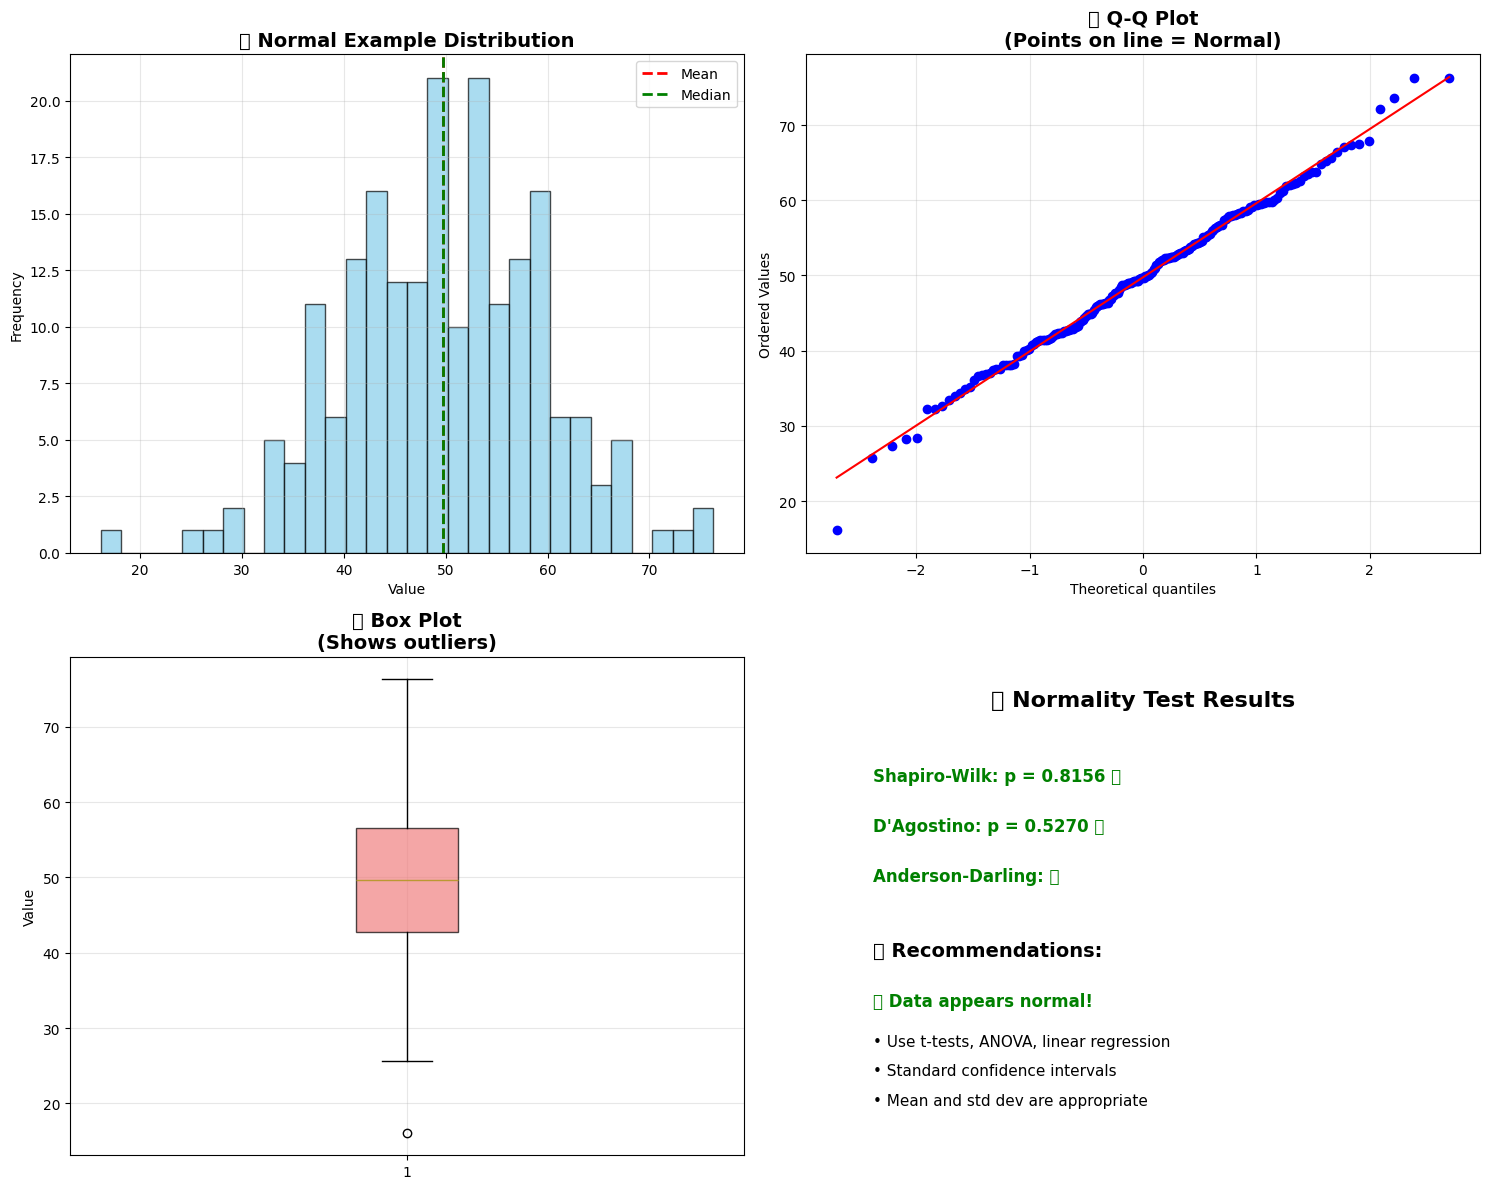


📈 SUMMARY:
Overall Assessment: ✅ NORMAL
Tests passed: 3/3
Skewness: -0.080 (Left skewed)
Kurtosis: 0.294 (Heavy tails)

🎮 EXAMPLE 2: Skewed data
🔍 TESTING NORMALITY: Skewed Example
Sample size: 200
Mean: 2.02
Median: 1.35
Std Dev: 2.08



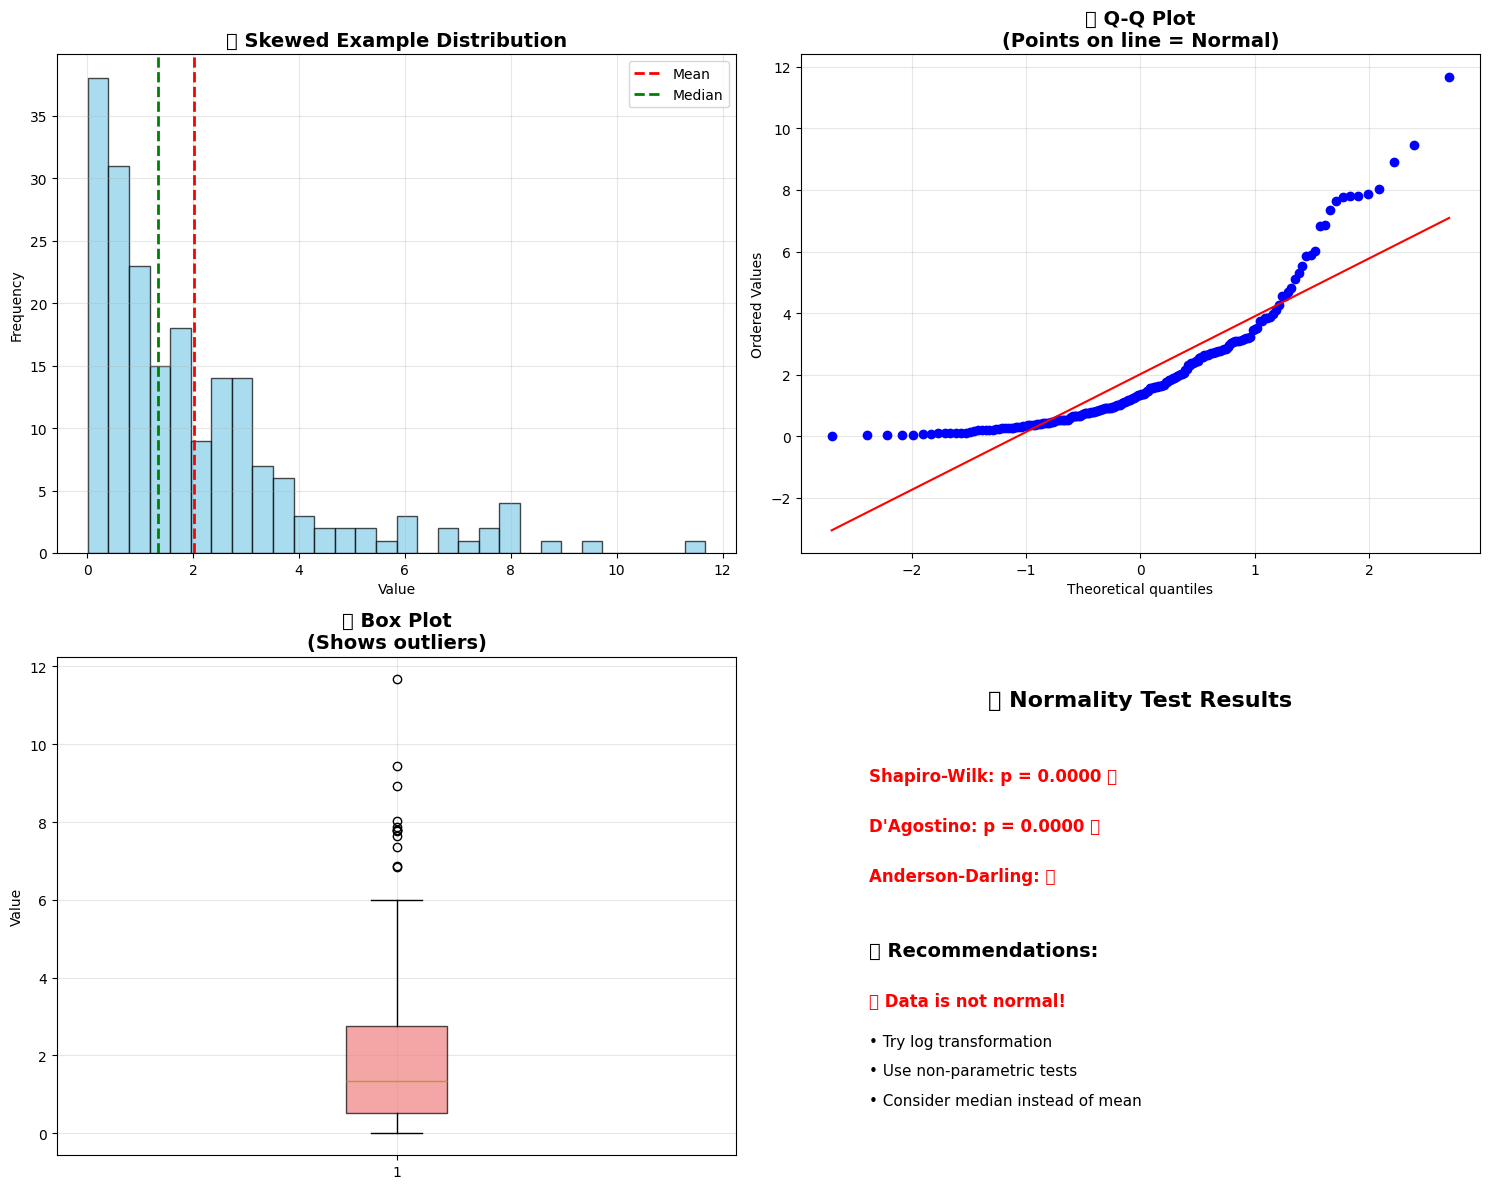


📈 SUMMARY:
Overall Assessment: ❌ NOT NORMAL
Tests passed: 0/3
Skewness: 1.841 (Right skewed)
Kurtosis: 3.672 (Heavy tails)

🎮 TRY YOUR OWN DATA:
Replace the data in the cell below and run it!


In [6]:
def normality_tester(data_input, data_name="Your Data"):
    """
    Complete normality testing function
    
    Parameters:
    data_input: array-like, your data to test
    data_name: string, name for your dataset
    """
    
    data = np.array(data_input)
    
    print(f"🔍 TESTING NORMALITY: {data_name}")
    print("=" * 50)
    print(f"Sample size: {len(data)}")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Median: {np.median(data):.2f}")
    print(f"Std Dev: {np.std(data):.2f}\n")
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Histogram
    ax1.hist(data, bins=min(30, len(np.unique(data))), alpha=0.7, 
             color='skyblue', edgecolor='black')
    ax1.axvline(np.mean(data), color='red', linestyle='--', linewidth=2, label='Mean')
    ax1.axvline(np.median(data), color='green', linestyle='--', linewidth=2, label='Median')
    ax1.set_title(f'📊 {data_name} Distribution', fontsize=14, weight='bold')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Q-Q Plot
    stats.probplot(data, dist="norm", plot=ax2)
    ax2.set_title(f'📈 Q-Q Plot\n(Points on line = Normal)', fontsize=14, weight='bold')
    ax2.grid(True, alpha=0.3)
    
    # 3. Box Plot
    box_data = ax3.boxplot(data, vert=True, patch_artist=True)
    box_data['boxes'][0].set_facecolor('lightcoral')
    box_data['boxes'][0].set_alpha(0.7)
    ax3.set_ylabel('Value')
    ax3.set_title('📦 Box Plot\n(Shows outliers)', fontsize=14, weight='bold')
    ax3.grid(True, alpha=0.3)
    
    # 4. Statistical Tests Results
    ax4.axis('off')
    
    # Run multiple normality tests
    tests_performed = []
    
    # Shapiro-Wilk (best for smaller samples)
    if len(data) <= 5000:
        sample = data[:min(1000, len(data))]  # Shapiro limit
        shapiro_stat, shapiro_p = shapiro(sample)
        tests_performed.append(('Shapiro-Wilk', shapiro_p))
    
    # D'Agostino's test
    if len(data) >= 8:  # Minimum sample size
        dagostino_stat, dagostino_p = normaltest(data)
        tests_performed.append(("D'Agostino", dagostino_p))
    
    # Anderson-Darling test
    anderson_result = anderson(data, dist='norm')
    # Convert to p-value equivalent (approximate)
    anderson_critical = anderson_result.critical_values[2]  # 5% level
    anderson_normal = anderson_result.statistic < anderson_critical
    
    # Display test results
    ax4.text(0.5, 0.9, f"🧪 Normality Test Results", ha='center', fontsize=16, weight='bold')
    
    y_pos = 0.75
    normal_count = 0
    
    for test_name, p_value in tests_performed:
        is_normal = p_value > 0.05
        if is_normal:
            normal_count += 1
        
        result_text = f"{test_name}: p = {p_value:.4f} {'✅' if is_normal else '❌'}"
        color = 'green' if is_normal else 'red'
        
        ax4.text(0.1, y_pos, result_text, fontsize=12, weight='bold', color=color)
        y_pos -= 0.1
    
    # Anderson-Darling
    ad_text = f"Anderson-Darling: {'✅' if anderson_normal else '❌'}"
    ad_color = 'green' if anderson_normal else 'red'
    ax4.text(0.1, y_pos, ad_text, fontsize=12, weight='bold', color=ad_color)
    y_pos -= 0.15
    
    # Overall assessment
    total_tests = len(tests_performed) + 1
    if anderson_normal:
        normal_count += 1
    
    overall_normal = normal_count >= total_tests // 2
    
    # Recommendations
    ax4.text(0.1, y_pos, "📋 Recommendations:", fontsize=14, weight='bold')
    y_pos -= 0.1
    
    if overall_normal:
        ax4.text(0.1, y_pos, "✅ Data appears normal!", fontsize=12, weight='bold', color='green')
        y_pos -= 0.08
        ax4.text(0.1, y_pos, "• Use t-tests, ANOVA, linear regression", fontsize=11)
        y_pos -= 0.06
        ax4.text(0.1, y_pos, "• Standard confidence intervals", fontsize=11)
        y_pos -= 0.06
        ax4.text(0.1, y_pos, "• Mean and std dev are appropriate", fontsize=11)
    else:
        ax4.text(0.1, y_pos, "❌ Data is not normal!", fontsize=12, weight='bold', color='red')
        y_pos -= 0.08
        
        # Check if right-skewed
        skewness = stats.skew(data)
        if skewness > 1:
            ax4.text(0.1, y_pos, "• Try log transformation", fontsize=11)
            y_pos -= 0.06
        elif skewness > 0.5:
            ax4.text(0.1, y_pos, "• Try square root transformation", fontsize=11)
            y_pos -= 0.06
        
        ax4.text(0.1, y_pos, "• Use non-parametric tests", fontsize=11)
        y_pos -= 0.06
        ax4.text(0.1, y_pos, "• Consider median instead of mean", fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print(f"\n📈 SUMMARY:")
    print(f"Overall Assessment: {'✅ NORMAL' if overall_normal else '❌ NOT NORMAL'}")
    print(f"Tests passed: {normal_count}/{total_tests}")
    print(f"Skewness: {stats.skew(data):.3f} ({'Right' if stats.skew(data) > 0 else 'Left'} skewed)")
    print(f"Kurtosis: {stats.kurtosis(data):.3f} ({'Heavy' if stats.kurtosis(data) > 0 else 'Light'} tails)")
    
    return overall_normal

# Test with some example data
print("🎮 EXAMPLE 1: Normal data")
normal_example = np.random.normal(50, 10, 200)
normality_tester(normal_example, "Normal Example")

print("\n" + "="*60)
print("🎮 EXAMPLE 2: Skewed data")
skewed_example = np.random.exponential(2, 200)
normality_tester(skewed_example, "Skewed Example")

print("\n" + "="*60)
print("🎮 TRY YOUR OWN DATA:")
print("Replace the data in the cell below and run it!")

🔬 TESTING YOUR CUSTOM DATA:
🔍 TESTING NORMALITY: My Custom Dataset
Sample size: 20
Mean: 46.30
Median: 46.50
Std Dev: 14.38



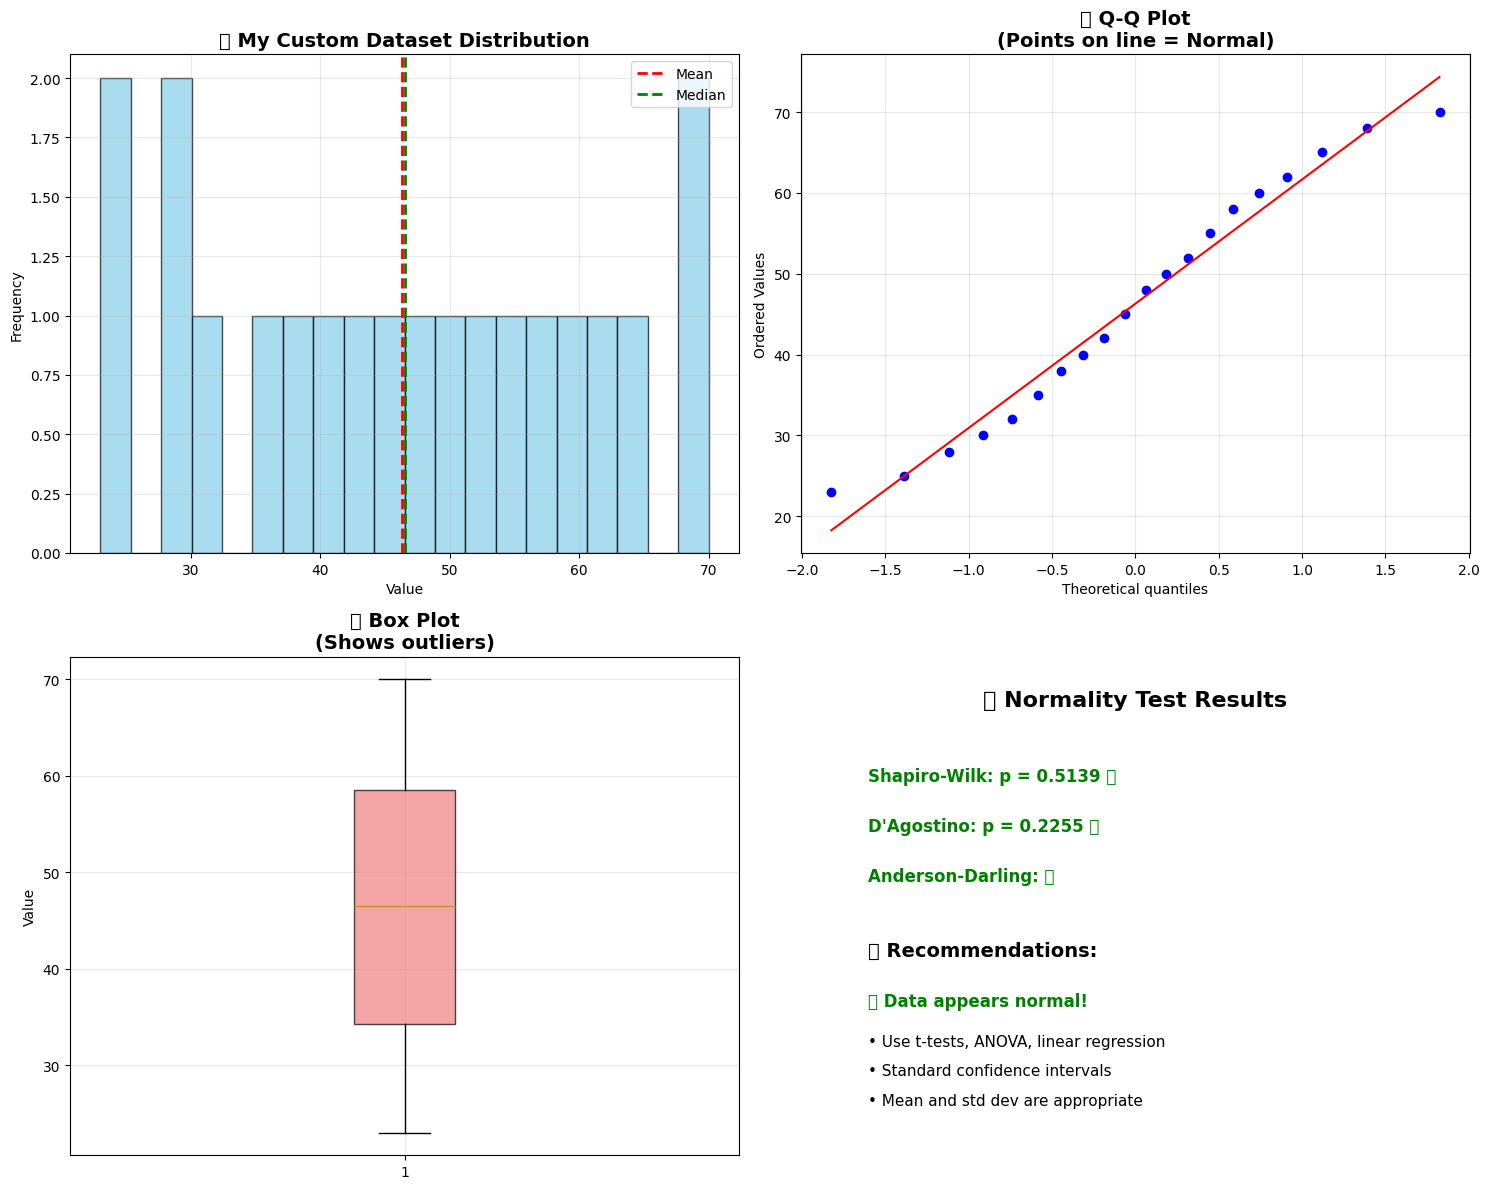


📈 SUMMARY:
Overall Assessment: ✅ NORMAL
Tests passed: 3/3
Skewness: 0.016 (Right skewed)
Kurtosis: -1.212 (Light tails)


In [7]:
# 🎮 TEST YOUR OWN DATA!
# Replace the numbers below with your own dataset:

my_data = [23, 25, 28, 30, 32, 35, 38, 40, 42, 45, 48, 50, 52, 55, 58, 60, 62, 65, 68, 70]

print("🔬 TESTING YOUR CUSTOM DATA:")
result = normality_tester(my_data, "My Custom Dataset")

# Try these interesting examples by uncommenting them:

# Example 1: Perfect normal data
# perfect_normal = np.random.normal(100, 15, 500)
# normality_tester(perfect_normal, "Perfect Normal Data")

# Example 2: Highly skewed data
# very_skewed = np.random.lognormal(2, 1, 300)
# normality_tester(very_skewed, "Very Skewed Data")

# Example 3: Bimodal data
# bimodal = np.concatenate([np.random.normal(30, 5, 150), np.random.normal(70, 5, 150)])
# normality_tester(bimodal, "Bimodal Data")

---
## 🎯 Summary and Key Takeaways

In [8]:
def distribution_testing_summary():
    """Complete summary of distribution testing concepts"""
    
    print("🎓 DISTRIBUTION TESTING: COMPLETE GUIDE")
    print("=" * 50)
    
    concepts = {
        "🍪 The Cookie Oven Analogy": [
            "Perfect oven (normal) → Use standard statistical tests",
            "Broken oven (skewed) → Transform data or use non-parametric tests",
            "Weird oven (bimodal) → Analyze groups separately",
            "Always check your 'oven' before 'baking' statistics!"
        ],
        "🔍 Testing Tools": [
            "👁️ Visual: Histograms, Q-Q plots, box plots",
            "🧪 Statistical: Shapiro-Wilk, D'Agostino, Anderson-Darling",
            "📊 Rule: p-value > 0.05 suggests normality",
            "⚖️ Use multiple tests for confidence"
        ],
        "🛠️ When Data Isn't Normal": [
            "🔄 Transform: log, square root, Box-Cox",
            "📈 Non-parametric: Mann-Whitney, Kruskal-Wallis",
            "💪 Robust methods: Median, bootstrap",
            "📏 Large samples: Central Limit Theorem helps"
        ],
        "💼 Business Applications": [
            "📊 Sales forecasting: Check distribution first",
            "⚡ Quality control: Monitor process normality",
            "👥 Customer analysis: Different groups, different distributions",
            "📈 A/B testing: Ensure valid comparison methods"
        ],
        "🚨 Common Mistakes": [
            "❌ Assuming normality without testing",
            "❌ Using inappropriate tests for skewed data",
            "❌ Ignoring outliers that break normality",
            "❌ Over-interpreting small p-values",
            "✅ Always visualize AND test!"
        ]
    }
    
    for section, points in concepts.items():
        print(f"\n{section}:")
        for point in points:
            print(f"  {point}")
    
    print(f"\n🏆 PRACTICAL WISDOM:")
    wisdom = [
        "👀 Visualize first - your eyes are powerful tools",
        "🧪 Test formally - don't just guess", 
        "🎯 Choose appropriate methods based on your data",
        "🔄 Transform when helpful, but keep interpretability",
        "💼 Remember the business context"
    ]
    
    for tip in wisdom:
        print(f"  {tip}")
    
    print(f"\n📋 QUICK DECISION TREE:")
    print(f"  1. Plot your data (histogram, Q-Q plot)")
    print(f"  2. Run normality tests")
    print(f"  3. If normal → Use parametric tests")
    print(f"  4. If not normal → Try transformation")
    print(f"  5. Still not normal → Use non-parametric tests")
    print(f"  6. Always report your approach!")
    
    print(f"\n🚀 NEXT STEPS:")
    print(f"  • Practice with your own datasets")
    print(f"  • Learn about specific transformations")
    print(f"  • Explore non-parametric alternatives")
    print(f"  • Remember: Perfect normality is rare - focus on 'good enough'!")

distribution_testing_summary()

🎓 DISTRIBUTION TESTING: COMPLETE GUIDE

🍪 The Cookie Oven Analogy:
  Perfect oven (normal) → Use standard statistical tests
  Broken oven (skewed) → Transform data or use non-parametric tests
  Weird oven (bimodal) → Analyze groups separately
  Always check your 'oven' before 'baking' statistics!

🔍 Testing Tools:
  👁️ Visual: Histograms, Q-Q plots, box plots
  🧪 Statistical: Shapiro-Wilk, D'Agostino, Anderson-Darling
  📊 Rule: p-value > 0.05 suggests normality
  ⚖️ Use multiple tests for confidence

🛠️ When Data Isn't Normal:
  🔄 Transform: log, square root, Box-Cox
  📈 Non-parametric: Mann-Whitney, Kruskal-Wallis
  💪 Robust methods: Median, bootstrap
  📏 Large samples: Central Limit Theorem helps

💼 Business Applications:
  📊 Sales forecasting: Check distribution first
  ⚡ Quality control: Monitor process normality
  👥 Customer analysis: Different groups, different distributions
  📈 A/B testing: Ensure valid comparison methods

🚨 Common Mistakes:
  ❌ Assuming normality without testin

---
## 🎮 Practice Exercises

Test your understanding with these challenges:

### 🍪 **Exercise 1: Cookie Inspector**
You have three batches of cookie data:
- Batch A: `[7.2, 7.8, 8.1, 8.3, 8.5, 8.7, 8.9, 9.1, 9.3, 9.5]`
- Batch B: `[3, 4, 4, 5, 5, 5, 6, 6, 7, 12]`
- Batch C: `[4, 4, 5, 5, 9, 9, 10, 10, 10, 11]`

Use the interactive tester above to:
1. Test each batch for normality
2. Identify which "oven type" each represents
3. Recommend appropriate statistical approaches

### 📊 **Exercise 2: Sales Analyst**
You're analyzing monthly sales data that shows:
- Mean: $50,000
- Median: $35,000
- Mode: $30,000

Questions:
1. Is this data likely normal? Why or why not?
2. What type of distribution does this suggest?
3. What transformation might help?
4. What business insights can you draw?

### 🔬 **Exercise 3: Data Detective**
Create your own datasets that represent:
1. A "perfect oven" (normal distribution)
2. A "broken oven" (right-skewed)
3. A "weird oven" (bimodal)

Test them with the interactive tool and see if you can "fool" the tests!

### 💡 **Challenge: The Transformation Master**
Take a highly skewed dataset and try different transformations until you achieve normality. Document:
- Original distribution shape
- Transformations attempted
- Which transformation worked best
- How you would interpret results in the transformed scale

---
*Remember: Testing distribution assumptions isn't just academic - it determines whether your statistical conclusions are valid! Like checking your oven before baking, it's a crucial first step that saves you from "burnt" results later.* 🍪✨